### Import libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset
- https://github.com/kayoyin/scr/blob/main/dgs-coref/data.json

In [72]:
df = pd.read_json('../data/data.json')
df = df.T
df.index.name = 'id'
df = df.reset_index()
df.head()

,id,text,glosses,participant
0,b'1429737',$GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-G...,"[[{'start': 280, 'end': 580, 'gloss': '$GEST-O...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."
1,b'1183720-17021701-17054739',I1* PAST-OR-BACK-THEN1* . I1 PAST-OR-BACK-THEN...,"[[{'start': 2180, 'end': 2520, 'gloss': 'ICH1*...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."
2,b'1182135',I1 . ALSO1A WAS1* INVOLVED1A* YOU1* INTELLIGEN...,"[[{'start': 113900, 'end': 114040, 'gloss': 'I...","[A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ..."


- **Transform the dataset, to see each case**
    - Dataset explanation: DGS-Coref comprises 16 minutes 30 seconds of
signing from 3 different conversations featuring
5 different signers. It is composed of 288 signed
sentences with 1,457 total glosses, including 95 hIi
signs where the signer points towards their chest

In [73]:
for index, row in df.iterrows():
    text = row["text"]
    list_of_glosses = row["glosses"]
    list_of_participants = row["participant"]
    print("id: ", row["id"])
    print("participants: ", len(set(list_of_participants)))
    print("grouped glosses: ", len(list_of_glosses))
    print("glosses: ", sum([len(gloss) for gloss in list_of_glosses]))
    print("text: ", text)
    print("----")

id:  b'1429737'
participants:  2
grouped glosses:  114
glosses:  608
text:  $GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-GROW-UP1A $GEST-OFF^ I2 TO-GROW-UP1A AS-ALWAYS1* DEAF1A* TO-SIGN1A* I1* . TO-GROW-UP1A UNTIL1 I1 $NUM-TEEN1:5 OLD5A . SCHOOL3 TO-DISMISS1 TO-SWIM1 $GEST-OFF^ . I1 TO-GROW-UP1A UNTIL1 SCHOOL3 TO-DISMISS1 $NUM-TEEN1:5 OLD5B I1 . THEN1A* . PARENTS1A QUESTION1 . PERMISSION3 I1 $INDEX1 TO-GET-IN1 FIRST-TIME3A DEAF1A CLUB-OR-SOCIETY2A TO-SWIM1 TO-GET-IN1 . THERE1 TO-PRACTICE1 TO-SWIM1 BACK-AND-FORTH1* . DEAF1A* PERSON1* TALK2A . I1 INTEREST1B FUN1 ALL1A^ . BEFOREHAND1 YOUNG2 I1* NOT3A ALLOWED1 NOT3A CLUB-OR-SOCIETY2A $INDEX1 . NOW1 $INDEX1 $GEST-OFF^* . TALK2A WORKOUT1 TO-SWIM1 BACK-AND-FORTH1* . $INDEX1 YOUNG2 TO-GUIDE1B $INDEX1 TOGETHER1A* CARE1 TO-LOOK-AFTER-SB1A TOGETHER1A* TALK2A . INTEREST1B ADULTS2A* I1 FUN1 TALK2A . MORE1* EXPERIENCE-OR-KNOWLEDGE2B $INDEX1 I2 TALK2A ALL2A^ . AND-THEN1 YOUNG2 TO-GUIDE1B APPOINTMENT1A THEN1A ONCE1B SATURDAY1 I2 TOGETHER1A* TRIP2* . T

- **Disaggregate data by gloss**

In [79]:
glosses_data = []

for index, row in df.iterrows():
    video_id = row["id"]
    text = row["text"]
    list_of_glosses = row["glosses"]
    list_of_participants = row["participant"]
    j=0
    for i, gloss_group in enumerate(list_of_glosses):
        for gloss in gloss_group:
            gloss_data = {
                "video_id": str(video_id),
                "gloss": str(gloss['gloss']),
                "hand": "right" if gloss['hand'] == "r" else "left",
                "lexeme_sign": str(gloss['Lexeme_Sign']),
                "sign": str(gloss['Sign']),
                "finger_mcp_0": gloss['FINGER_MCP'][0],
                "finger_mcp_1": gloss['FINGER_MCP'][1],
                "finger_tip_0": gloss['FINGER_TIP'][0],
                "finger_tip_1": gloss['FINGER_TIP'][1],
                "Geb\u00e4rde": str(gloss['Geb\u00e4rde']),
                "gloss_id": gloss['gloss_id'],
                "start": gloss['start'],
                "end": gloss['end'],
                "participant": f"video_{index+1}_{list_of_participants[j]}",
                "gloss_group": i+1,
                "text": text,
            }
            j+=1
            glosses_data.append(gloss_data)

glosses_df = pd.DataFrame(glosses_data)
glosses_df.head()

,video_id,gloss,hand,lexeme_sign,sign,finger_mcp_0,finger_mcp_1,finger_tip_0,finger_tip_1,Gebärde,gloss_id,start,end,participant,gloss_group,text
0,b'1429737',$GEST-OFF^*,left,$GEST-OFF^*,$GEST-OFF^*,257.933333,171.266667,247.000000,162.333333,$GEST-OFF^*,0,280,580,video_1_A,1,$GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-G...
1,b'1429737',ICH1,left,I1,I1^,317.684211,156.500000,315.473684,159.789474,ICH1^,1,760,1520,video_1_A,1,$GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-G...
2,b'1429737',$GEST-OFF^,right,$GEST-OFF^,$GEST-OFF^,55.045455,51.954545,54.954545,51.863636,$GEST-OFF^,2,1600,2040,video_1_A,1,$GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-G...
3,b'1429737',AUFWACHSEN1A,left,TO-GROW-UP1A,TO-GROW2A^,171.166667,142.666667,159.791667,152.541667,WACHSEN2A^,3,2100,2580,video_1_A,1,$GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-G...
4,b'1429737',ICH2,left,I2,I2^,218.250000,135.000000,213.500000,130.750000,ICH2^,4,2740,2820,video_1_A,1,$GEST-OFF^* I1 $GEST-OFF^ TO-GROW-UP1A I2 TO-G...


- **Columns**

In [80]:
glosses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      1457 non-null   object 
 1   gloss         1457 non-null   object 
 2   hand          1457 non-null   object 
 3   lexeme_sign   1457 non-null   object 
 4   sign          1457 non-null   object 
 5   finger_mcp_0  1457 non-null   float64
 6   finger_mcp_1  1457 non-null   float64
 7   finger_tip_0  1457 non-null   float64
 8   finger_tip_1  1457 non-null   float64
 9   Gebärde       1457 non-null   object 
 10  gloss_id      1457 non-null   int64  
 11  start         1457 non-null   int64  
 12  end           1457 non-null   int64  
 13  participant   1457 non-null   object 
 14  gloss_group   1457 non-null   int64  
 15  text          1457 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 182.2+ KB


- **How many unique glosses are there?**

In [81]:
len(set(list(glosses_df["gloss"])))

682

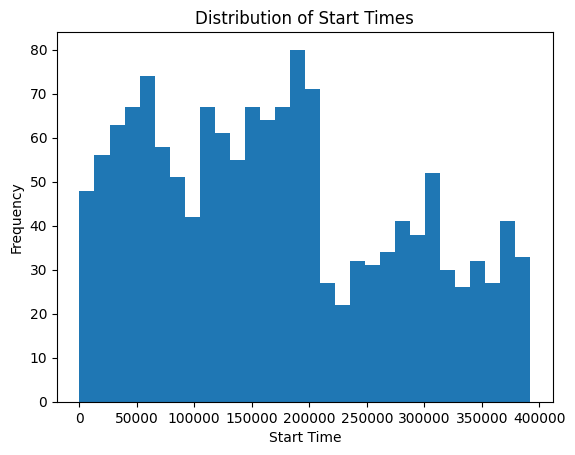

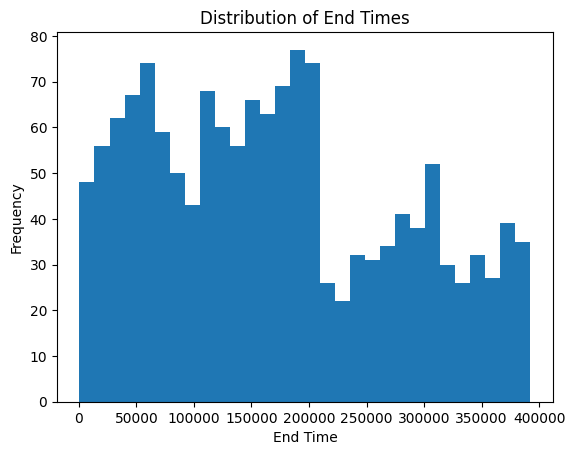

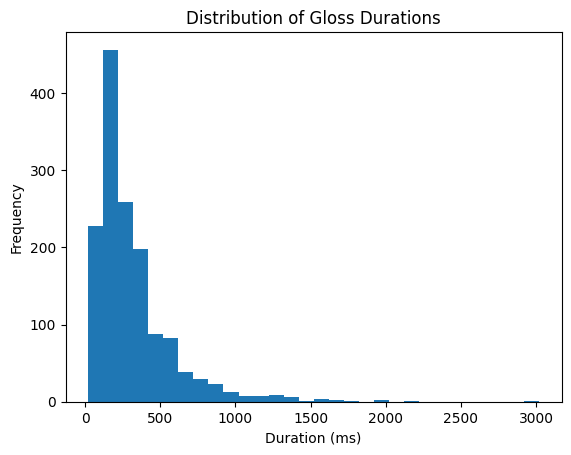

In [82]:
plt.hist(glosses_df['start'], bins=30)
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Times')
plt.show()

plt.hist(glosses_df['end'], bins=30)
plt.xlabel('End Time')
plt.ylabel('Frequency')
plt.title('Distribution of End Times')
plt.show()

glosses_df['duration'] = glosses_df['end'] - glosses_df['start']
plt.hist(glosses_df['duration'], bins=30)
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Gloss Durations')
plt.show()

- **Most frequent glosses**

Top 10 most frequent glosses:
gloss
$INDEX1            68
ICH1               48
ICH2               32
$GEST-OFF^         27
$INDEX1*           23
$PROD*             20
$GEST-OFF^*        19
SCHWIMMEN1         15
VEREIN2A           12
TAUB-GEHÖRLOS1A    12
Name: count, dtype: int64


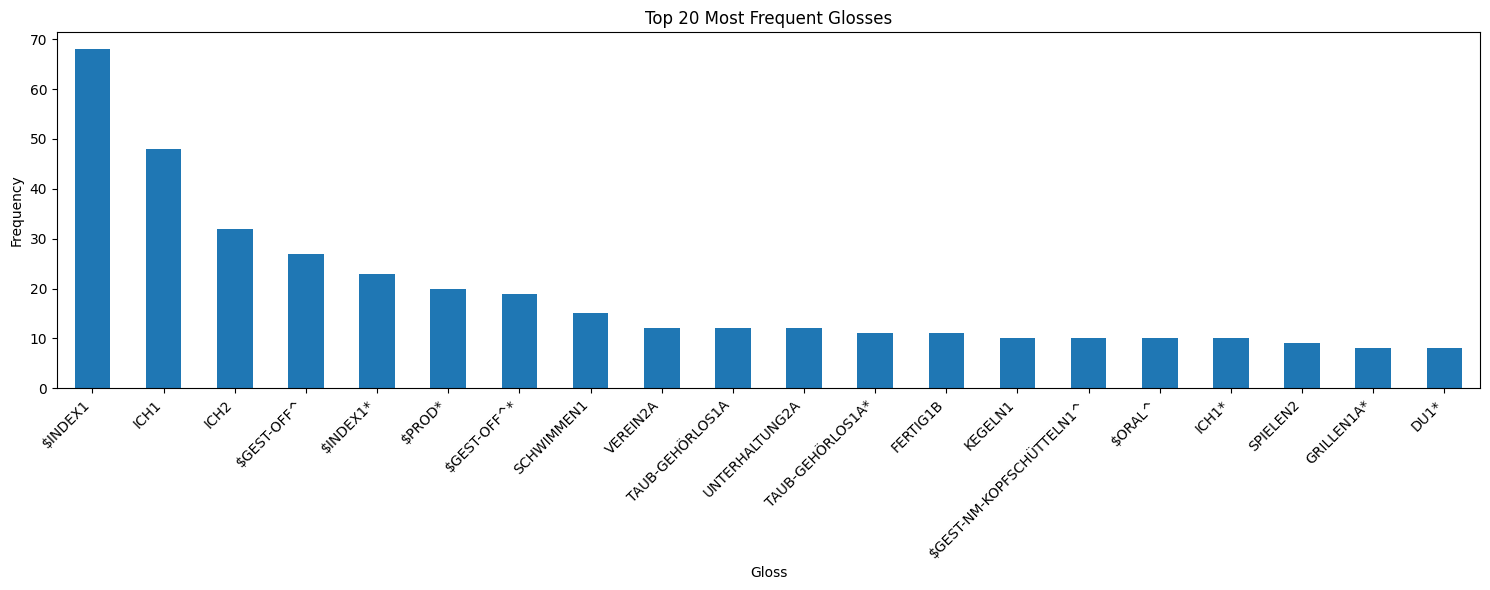

In [83]:
# 1. Get frequency distribution of glosses
gloss_counts = glosses_df['gloss'].value_counts()
print("Top 10 most frequent glosses:")
print(gloss_counts.head(10))

# Create a bar plot of the top 20 most frequent glosses
plt.figure(figsize=(15, 6))
gloss_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Frequent Glosses')
plt.xlabel('Gloss')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Hand distribution**


Distribution by hand:
hand
right    801
left     656
Name: count, dtype: int64


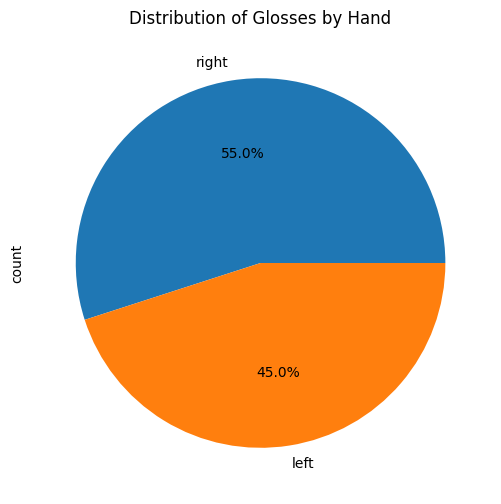

In [84]:
hand_distribution = glosses_df['hand'].value_counts()
print("\nDistribution by hand:")
print(hand_distribution)

plt.figure(figsize=(8, 6))
hand_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Glosses by Hand')
plt.show()

- **Cross tabulation; GLOSS AND HAND**

In [85]:
hand_gloss_cross = pd.crosstab(glosses_df['gloss'], glosses_df['hand'])
print("\nTop 10 glosses by hand:")
print(hand_gloss_cross.head(10))


Top 10 glosses by hand:
hand                       left  right
gloss                                 
$ALPHA1:O*                    0      1
$ALPHA1:S                     0      1
$GEST-ABWINKEN1^              3      4
$GEST-ABWINKEN1^*             0      3
$GEST-BITTE1^*                0      1
$GEST-NM-KOPFNICKEN1^         0      4
$GEST-NM-KOPFSCHÜTTELN1^      0     10
$GEST-NM-KOPFSCHÜTTELN1^*     0      1
$GEST-NM-KOPFWIPPEN1^         0      1
$GEST-NM-SPRECHEN1^           0      1


- **Calculate basic statistics for durations by gloss**


In [86]:
duration_stats = glosses_df.groupby('gloss')['duration'].agg(['mean', 'std', 'count']).sort_values('count', ascending=False)
print("\nDuration statistics for top 10 glosses:")
print(duration_stats.head(10))


Duration statistics for top 10 glosses:
                       mean         std  count
gloss                                         
$INDEX1          208.235294  125.364438     68
ICH1             162.500000  160.564165     48
ICH2             105.625000   46.623924     32
$GEST-OFF^       307.407407  250.731125     27
$INDEX1*         266.086957  242.219644     23
$PROD*           670.000000  437.625170     20
$GEST-OFF^*      216.842105  313.918826     19
SCHWIMMEN1       372.000000  141.582888     15
VEREIN2A         318.333333   68.997145     12
TAUB-GEHÖRLOS1A  310.000000  172.995008     12


- **Correlation between finger positions**
    - finger_mcp coordenates -> Stands for: Metacarpophalangeal Joint
        -  finger_mcp_0 is x 
        -  finger_mcp_1 is y
    - finger_tip coordenates -> Stands for: Fingertip
        - finger_tip_0 is x
        - finger_tip_1 is y

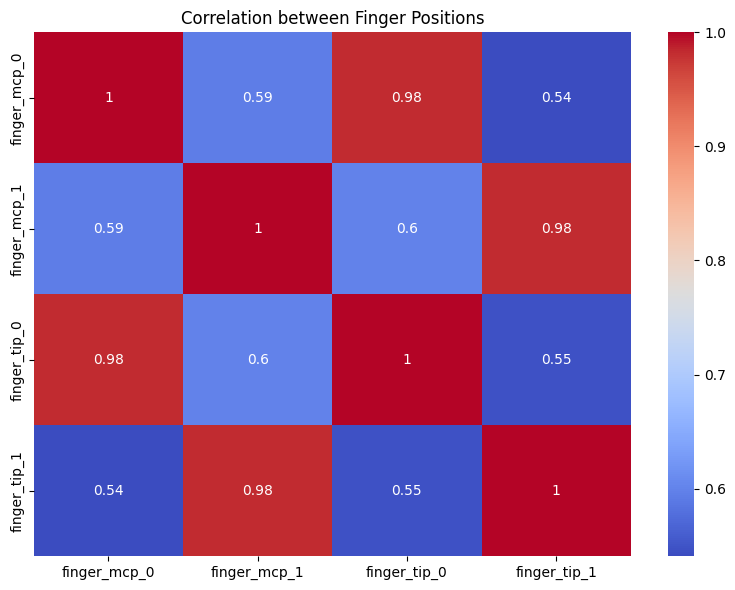

In [87]:
# 6. Create a heatmap of finger positions
finger_columns = ['finger_mcp_0', 'finger_mcp_1', 'finger_tip_0', 'finger_tip_1']
correlation_matrix = glosses_df[finger_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Finger Positions')
plt.tight_layout()
plt.show()

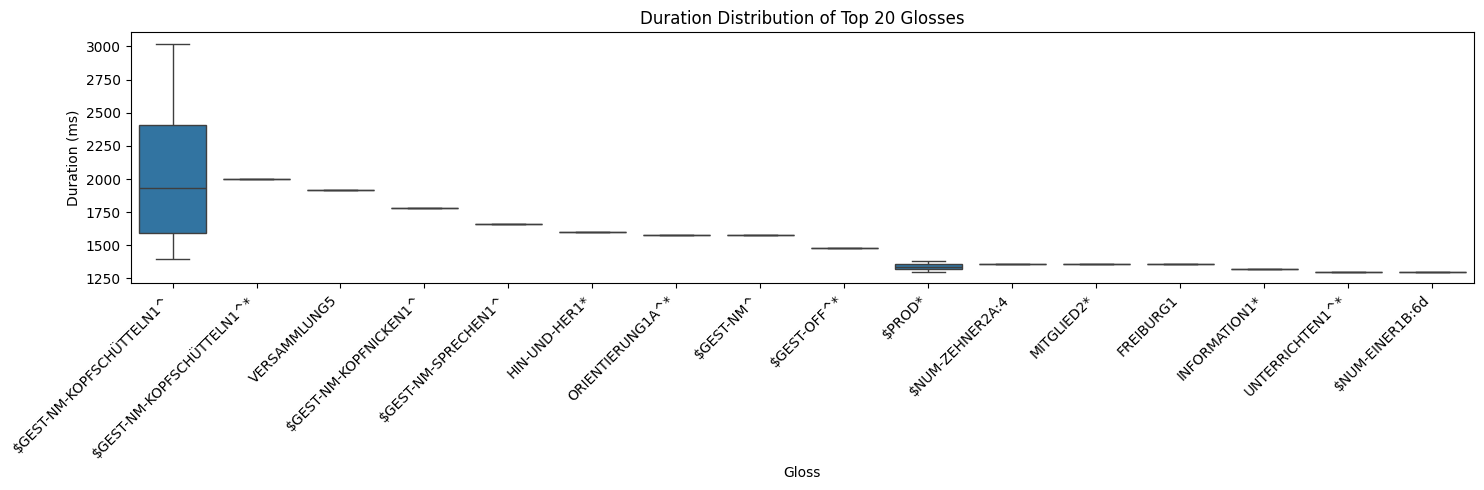


Average duration by hand:
hand
left     268.353659
right    342.896380
Name: duration, dtype: float64


In [88]:
# Time-based patterns
plt.figure(figsize=(15, 5))
sns.boxplot(x='gloss', y='duration', data=glosses_df.sort_values('duration', ascending=False)[:20])
plt.xticks(rotation=45, ha='right')
plt.title('Duration Distribution of Top 20 Glosses')
plt.xlabel('Gloss')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()

# Average duration by hand
avg_duration_by_hand = glosses_df.groupby('hand')['duration'].mean()
print("\nAverage duration by hand:")
print(avg_duration_by_hand)

- **Analysis per participant**

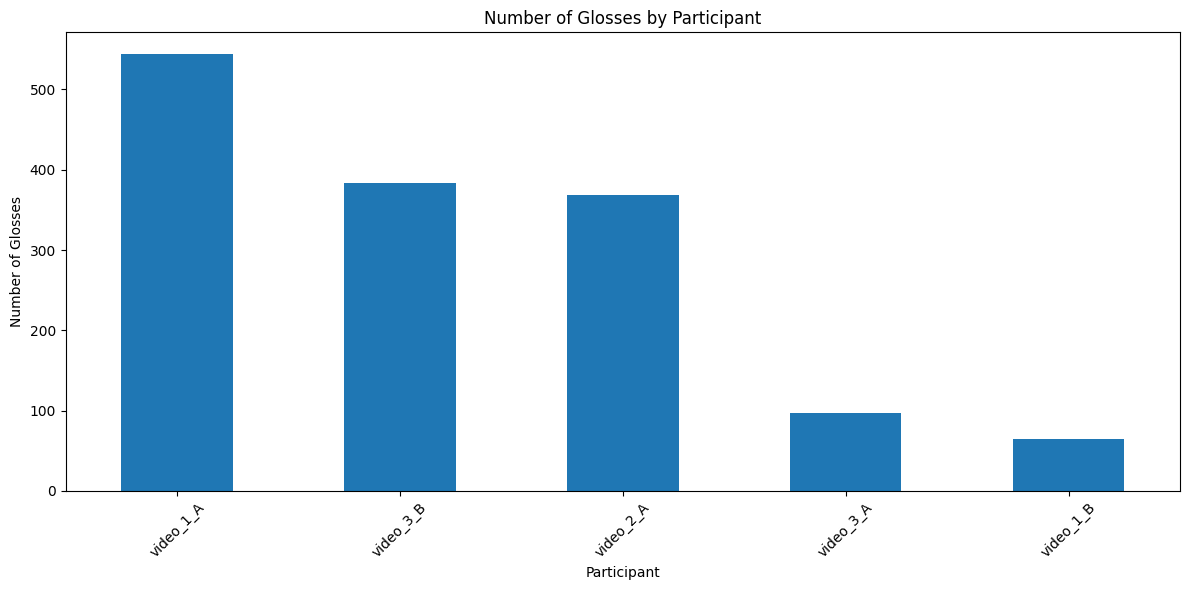


Average finger positions by participant:
             finger_mcp_0  finger_mcp_1  finger_tip_0  finger_tip_1
participant                                                        
video_1_A      258.373772    145.775062    247.926617    144.103618
video_1_B      268.727895    179.163045    275.172214    180.957155
video_2_A      284.940756    161.690641    293.547436    159.852625
video_3_A      285.775244    188.448859    281.367304    186.237426
video_3_B      265.119761    170.968206    272.966558    165.092898


In [89]:
# Number of glosses per participant
plt.figure(figsize=(12, 6))
participant_counts = glosses_df['participant'].value_counts()
participant_counts.plot(kind='bar')
plt.title('Number of Glosses by Participant')
plt.xlabel('Participant')
plt.ylabel('Number of Glosses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average finger positions by participant
finger_cols = ['finger_mcp_0', 'finger_mcp_1', 'finger_tip_0', 'finger_tip_1']
avg_positions = glosses_df.groupby('participant')[finger_cols].mean()
print("\nAverage finger positions by participant:")
print(avg_positions)

In [90]:
# Create a transition matrix between glosses
def get_transitions(group):
    return list(zip(group['gloss'], group['gloss'].shift(-1)))

transitions = glosses_df.groupby('video_id').apply(get_transitions)
transition_pairs = [item for sublist in transitions for item in sublist if not pd.isna(item[1])]
transition_df = pd.DataFrame(transition_pairs, columns=['from_gloss', 'to_gloss'])
transition_counts = transition_df.groupby(['from_gloss', 'to_gloss']).size()

print("\nMost common gloss transitions:")
print(transition_counts.sort_values(ascending=False).head(10))


Most common gloss transitions:
from_gloss       to_gloss      
TAUB-GEHÖRLOS1A  VEREIN2A          4
$NUM-ORD1:2d     VORSITZENDER3     3
DEUTSCH1         MEISTERSCHAFT1    3
GEBÄRDEN1A       DOZENT1           3
$INDEX1          $GEST-OFF^*       3
                 $INDEX1           3
$GEST-OFF^       ICH2              3
GRILLEN1A*       PARTY1B*          3
SELBST1A         SPIELEN2          3
TAUB-GEHÖRLOS1A  BUND1A            3
dtype: int64


C:\Users\javie\AppData\Local\Temp\ipykernel_4356\3968254618.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transitions = glosses_df.groupby('video_id').apply(get_transitions)


- **Spatial Analysis of Finger Positions**

**MCP**

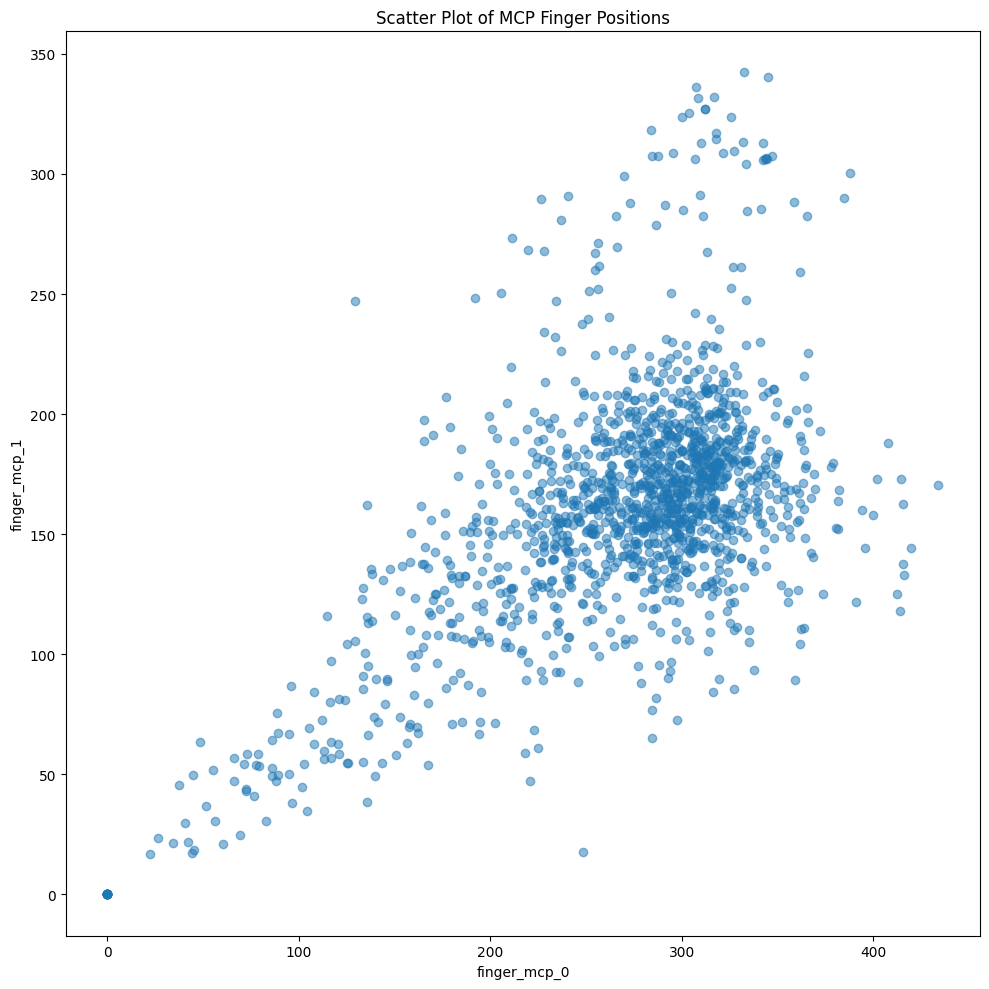


Position ranges for most common signs:
                          finger_mcp_0                                     \
                                   min         max        mean        std   
gloss                                                                       
$ALPHA1:O*                  301.000000  301.000000  301.000000        NaN   
$ALPHA1:S                   287.500000  287.500000  287.500000        NaN   
$GEST-ABWINKEN1^            196.166667  327.375000  268.868223  40.151034   
$GEST-ABWINKEN1^*           234.300000  284.333333  259.877778  25.035538   
$GEST-BITTE1^*              292.700000  292.700000  292.700000        NaN   
$GEST-NM-KOPFNICKEN1^       240.875000  345.178571  290.780844  44.516322   
$GEST-NM-KOPFSCHÜTTELN1^    234.471429  339.500000  282.951743  35.934603   
$GEST-NM-KOPFSCHÜTTELN1^*   307.390000  307.390000  307.390000        NaN   
$GEST-NM-KOPFWIPPEN1^        37.406250   37.406250   37.406250        NaN   
$GEST-NM-SPRECHEN1^         165.3012

In [96]:
# Create scatter plot of finger positions
plt.figure(figsize=(10, 10))
plt.scatter(glosses_df['finger_mcp_0'], glosses_df['finger_mcp_1'], alpha=0.5)
plt.title('Scatter Plot of MCP Finger Positions')
plt.xlabel('finger_mcp_0')
plt.ylabel('finger_mcp_1')
plt.tight_layout()
plt.show()

# Calculate position ranges for different signs
position_ranges = glosses_df.groupby('gloss')[["finger_mcp_0", "finger_mcp_1"]].agg(['min', 'max', 'mean', 'std'])
print("\nPosition ranges for most common signs:")
print(position_ranges.head(10))

**FINGER TIP**

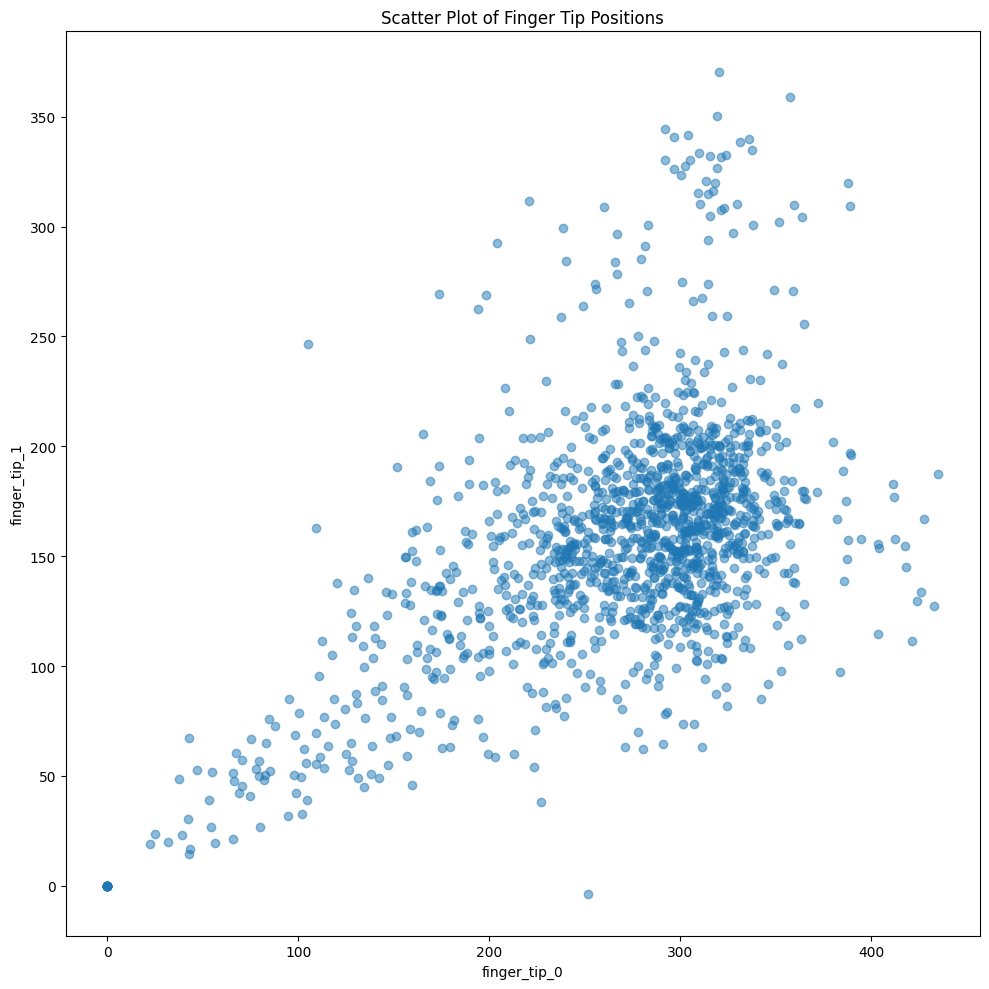


Position ranges for most common signs:
                          finger_tip_0                                     \
                                   min         max        mean        std   
gloss                                                                       
$ALPHA1:O*                  311.000000  311.000000  311.000000        NaN   
$ALPHA1:S                   302.400000  302.400000  302.400000        NaN   
$GEST-ABWINKEN1^            184.666667  299.875000  266.641667  38.490858   
$GEST-ABWINKEN1^*           239.000000  289.111111  262.570370  25.187262   
$GEST-BITTE1^*              310.900000  310.900000  310.900000        NaN   
$GEST-NM-KOPFNICKEN1^       260.375000  357.357143  299.350679  41.459394   
$GEST-NM-KOPFSCHÜTTELN1^    237.871429  360.409091  286.308537  37.567257   
$GEST-NM-KOPFSCHÜTTELN1^*   309.740000  309.740000  309.740000        NaN   
$GEST-NM-KOPFWIPPEN1^        37.281250   37.281250   37.281250        NaN   
$GEST-NM-SPRECHEN1^         165.2891

In [95]:
# Create scatter plot of finger positions
plt.figure(figsize=(10, 10))
plt.scatter(glosses_df['finger_tip_0'], glosses_df['finger_tip_1'], alpha=0.5)
plt.title('Scatter Plot of Finger Tip Positions')
plt.xlabel('finger_tip_0')
plt.ylabel('finger_tip_1')
plt.tight_layout()
plt.show()

# Calculate position ranges for different signs
position_ranges = glosses_df.groupby('gloss')[["finger_tip_0", "finger_tip_1"]].agg(['min', 'max', 'mean', 'std'])
print("\nPosition ranges for most common signs:")
print(position_ranges.head(10))

- **Export dataset**

In [70]:
glosses_df.to_csv('../data/glosses.csv', index=False)